# **Previs√£o de Dura√ß√£o de Viagens da NYC TLC com MLOps<br>**
<span style='color:Gray'> Do Treinamento √† Implanta√ß√£o e Monitoramento de Modelos de Regress√£o para Estimar Tempos de Viagem dos T√°xis de Nova York</span>

Autor: Wanderson Ferreira
</div>
<left><img src="https://raw.githubusercontent.com/wanderson42/portfolio-data/refs/heads/main/TAXI-DRIVER-ant.jpg"width="1000", height="680"/> <left> </div>
<p><center>Imagem meramente ilustrativa</center></p>

***


<p><center><b>Dicion√°rio de Dados - Street-Hail Liveries (t√°xis verdes) </b></center></p>


| ****Atributo****           | ****Descri√ß√£o****                                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| ****VendorID****            | ****C√≥digo indicando o provedor LPEP que forneceu o registro. <br> $1$ = Creative Mobile Technologies, LLC; <br> $2$ = VeriFone Inc.**** |
| ****lpep_pickup_datetime**** | ****Data e hora em que o tax√≠metro foi ativado.****                                                                   |
| ****lpep_dropoff_datetime****| ****Data e hora em que o tax√≠metro foi desativado.****                                                                |
| ****Passenger_count****      | ****N√∫mero de passageiros no ve√≠culo (valor inserido pelo motorista).****                                             |
| ****Trip_distance****        | ****Dist√¢ncia total da viagem em milhas, conforme registrado pelo tax√≠metro.****                                      |
| ****PULocationID****         | ****Zona de T√°xi TLC onde o tax√≠metro foi ativado.****                                                                |
| ****DOLocationID****         | ****Zona de T√°xi TLC onde o tax√≠metro foi desativado.****                                                            |
| ****RateCodeID****           | ****C√≥digo da tarifa final aplicada ao t√©rmino da viagem: <br> $1$ = Tarifa padr√£o <br> $2$ = JFK <br> $3$ = Newark <br> $4$ = Nassau ou Westchester <br> $5$ = Tarifa negociada <br> $6$ = Viagem em grupo**** |
| ****Store_and_fwd_flag****   | ****Indica se o registro da viagem foi armazenado na mem√≥ria do ve√≠culo antes de ser enviado ao servidor: <br> Y = Armazenado e enviado posteriormente <br> N = N√£o armazenado**** |
| ****Payment_type****         | ****C√≥digo num√©rico indicando o m√©todo de pagamento utilizado pelo passageiro: <br> $1$ = Cart√£o de cr√©dito <br> $2$ = Dinheiro <br> $3$ = Sem cobran√ßa <br> $4$ = Disputa <br> $5$ = Desconhecido <br> $6$ = Viagem cancelada****|
| ****Fare_amount****          | ****Valor calculado com base no tempo e na dist√¢ncia percorrida, registrado pelo tax√≠metro.****                       |
| ****Extra****                | ****Extras e sobretaxas, como as cobran√ßas de $ \$0.50 $ e $ \$1$ para hor√°rios de pico e noturnos.****                        |
| ****MTA_tax****              | ****Taxa de $ \$0.50$ automaticamente aplicada com base na tarifa em uso.****                                             |
| ****Improvement_surcharge****| ****Sobretaxa de $ \$0.30$ aplicada a viagens de t√°xi iniciadas ap√≥s 2015.****                                            |
| ****Tip_amount****           | ****Valor das gorjetas. Este campo √© automaticamente preenchido para gorjetas feitas via cart√£o de cr√©dito. <br> (Gorjetas em dinheiro n√£o est√£o inclu√≠das).**** |
| ****Tolls_amount****         | ****Valor total de ped√°gios pagos durante a viagem.****                                                               |
| ****ehail_fee****         | ****Taxa de uso por parte do passageiro pelo uso do sistema de "sauda√ß√£o eletr√¥nica" <br> (E-Hail, abreviatura de Electronic HAILing) permite que um passageiro use aplicativos licenciados pelo TLC para <br> solicitar viagens de t√°xi pr√©-agendadas.****                                                               |
| ****Total_amount****         | ****Valor total cobrado dos passageiros (n√£o inclui gorjetas em dinheiro).****                                        |
| ****Trip_type****            | ****C√≥digo indicando se a viagem foi chamada na rua (atrav√©s de uma sauda√ß√£o) ou por alguma tecnologia de comunica√ß√£o: <br> $1$ = Chamada na rua <br> $2$ = Despachada****    |
| ****congestion_surcharge****            | ****Sobre taxa aplicada desde 2019 para para viagens em t√°xis e ve√≠culos de aluguel que comecem, terminem ou passem pela Zona de Congestionamento. A Zona de Congestionamento √© na 96th Street em Manhattan. Os valores s√£o: <br> $ \$ 2.50 $ para t√°xis amarelos. <br> $ \$ 2.75$ para ve√≠culos de aluguel, incluindo limosines e t√°xis verdes. <br> $ \$ 0.75$ para viagem em grupo (_share riding_) em qualquer tipo de ve√≠culo. <br> $ \$ 0$ para servi√ßo de transporte de deficientes f√≠sicos (Access-A-Ride) e transporte p√∫blico da MTA.****



**Descri√ß√£o**

Os registros de viagem de t√°xi amarelo e verde incluem campos que capturam datas/hor√°rios de embarque e desembarque, locais de embarque e desembarque, dist√¢ncias de viagem, tarifas detalhadas, tipos de taxas, tipos de pagamento e contagens de passageiros relatadas pelo motorista. Os dados usados ‚Äã‚Äãnos conjuntos de dados em anexo foram coletados e fornecidos √† NYC Taxi and Limousine Commission (TLC) por provedores de tecnologia autorizados pelo Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). Todos os arquivos est√£o armazenados no formato PARQUET.

***
<p><center><b>Resumo </b></center></p>

Este notebook explorat√≥rio serve como base para o desenvolvimento de uma infraestrutura MLOps voltada para a previs√£o em tempo real da dura√ß√£o das viagens de t√°xi da TLC. Ele abrange an√°lise explorat√≥ria, engenharia de atributos e experimenta√ß√£o com modelos de regress√£o. Al√©m disso, dentro dos limites de um Jupyter Notebook, implementamos conceitos importantes que envolvem o ciclo de vida MLOps (treinamento, implanta√ß√£o e monitoramento). Como o rastreamento de experimentos via MLflow a partir de um servidor remoto, e o c√°lculo de m√©tricas por meio do Evidently para mensurar o desempenho e qualidade dos dados.

***

**Hip√≥teses**

Para uma abordagem estruturada e eficiente, a formula√ß√£o de hip√≥teses com base no conhecimento de dom√≠nio ajuda a focar em atributos realmente vi√°veis, evitando desperd√≠cio de tempo com vari√°veis que, embora informativas, n√£o s√£o pr√°ticas para uso em produ√ß√£o. No caso deste estudo, em que a previs√£o ocorre no momento da solicita√ß√£o da corrida, certas informa√ß√µes, por mais relevantes que sejam, podem n√£o estar dispon√≠veis em tempo real ou ser dif√≠ceis de quantificar na pr√°tica. Portanto, considerando esses v√≠nculos, as seguintes vari√°veis (a priori) devem ser priorizadas para estimar a dura√ß√£o da viagem:

- Vari√°veis num√©ricas: `trip_distance` (dist√¢ncia percorrida), `congestion_surcharge` (tarifa fixa aplicada, caso o trajeto inclua uma zona especifica de Manhattan)

- Vari√°veis categ√≥ricas: `rideID` (identificador √∫nico da corrida) e `PU_DO_LocationID` (combina√ß√£o do local de embarque `PULocationID` e desembarque `DOLocationID`)

In [90]:
!python --version

Python 3.12.7


In [91]:
import sklearn
sklearn.__version__

'1.3.1'

In [92]:
import pandas as pd
import numpy as np
import pickle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### 1 - Ingest√£o de Dados

Nessa etapa, os dados s√£o obtidos e efetua-se uma an√°lise explorat√≥ria em busca de erros, inconsist√™ncias e valores ausentes. 

In [93]:
import requests
from tqdm import tqdm
from pathlib import Path

# Lista de arquivos a serem baixados
FILES = [
    ("green_tripdata_2024-01.parquet", "./data"),
    ("green_tripdata_2024-02.parquet", "./data")
]


BASE_URL = "https://d37ci6vzurychx.cloudfront.net/trip-data"

def download_file(file_name, save_dir):
    """Faz o download de um arquivo e salva no diret√≥rio especificado."""
    url = f"{BASE_URL}/{file_name}"
    save_path = Path(save_dir) / file_name

    # Criar diret√≥rio se n√£o existir
    Path(save_dir).mkdir(parents=True, exist_ok=True)

    response = requests.get(url, stream=True)
    response.raise_for_status()  # Lan√ßa erro se a requisi√ß√£o falhar

    file_size = int(response.headers.get("Content-Length", 0))

    # Baixar o arquivo com barra de progresso
    with open(save_path, "wb") as file:
        for chunk in tqdm(response.iter_content(chunk_size=8192), 
                          desc=f"Baixando {file_name}",
                          unit="B",
                          unit_scale=True,
                          total=file_size):
            file.write(chunk)

    print(f"‚úî Arquivo salvo em: {save_path}")

# Loop sobre a lista de arquivos
for file_name, save_dir in FILES:
    download_file(file_name, save_dir)

Baixando green_tripdata_2024-01.parquet:   0%|                     | 167/1.36M [00:00<1:32:14, 246B/s]


‚úî Arquivo salvo em: data/green_tripdata_2024-01.parquet


Baixando green_tripdata_2024-02.parquet:   0%|                     | 157/1.28M [00:00<2:08:39, 166B/s]

‚úî Arquivo salvo em: data/green_tripdata_2024-02.parquet


In [641]:
# Importando o conjunto de dados
df_jan = pd.read_parquet('green_tripdata_2024-01.parquet')
# Determina o numerode colunas, data types, NaN
display(df_jan.info())
# Primeiras impress√µes sobre o conjunto de dados
display(df_jan.sample(n = 10).style.background_gradient(cmap = 'Set3'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

None

Nesse conjunto de dados o atributo alvo (dura√ß√£o da viagem) ainda n√£o foi criado. Podemos faz√™-lo a partir dos atributos que descrevem o hor√°rio em que o taxim√™tro foi ligado (`lpep_pickup_datetime`) e desligado (`lpep_dropoff_datetime`).

In [643]:
# Convertendo os atributos para o formato pandas datetime
df_jan['lpep_pickup_datetime'] = pd.to_datetime(df_jan['lpep_pickup_datetime'], errors='coerce')
df_jan['lpep_dropoff_datetime'] = pd.to_datetime(df_jan['lpep_dropoff_datetime'], errors='coerce')
df_jan['duration'] = (df_jan['lpep_dropoff_datetime'] - df_jan['lpep_pickup_datetime']).dt.total_seconds() / 60
# Amostra do atribuo
df_jan[['duration']].sample(5)

duration
24204   2.216667
33858   9.433333
53630  21.000000
44455   5.916667
37426  18.050000

Agora vamos explorar em mais detalhes os atributos. Segue abaixo as estatisticas descritivas do conjunto de dados:

In [96]:
df_jan.describe([0.01, 0.25, 0.5, 0.75, 0.9, 0.99]).style.background_gradient(cmap = 'Set3')

> Considerando a natureza num√©rica da maioria dos atributos do conjunto de dados (o que particularmente √© bom para problemas de regress√£o). A partir do m√©todo `describe()`, pode-se inferir os seguintes fatos a respeito dos dados:

#### 1.1 - Valores Extremos (Outliers)

  `trip_distance:`

> O valor m√°ximo √© extremamente alto ($201421.68$ milhas), indicando um poss√≠vel erro de registro ou unidade incompat√≠vel.

> O desvio padr√£o ($1417.46$) refor√ßa a presen√ßa de valores extremos.
A maioria dos dados est√° concentrada abaixo de $5.6$  milhas (90¬∫ percentil), sugerindo que o m√°ximo √© um _outlier_.

  `fare_amount:`

> Um valor m√≠nimo negativo ($-70$) √© inusitado, j√° que tarifas normalmente n√£o s√£o negativas.

>O valor m√°ximo ($1422.6$) parece alto, mas plaus√≠vel em casos de longas dist√¢ncias ou tarifas negociadas.

  `total_amount:`

>H√° um valor m√≠nimo negativo ($-76.5$) e um m√°ximo muito alto ($1424.1$), ambos merecem investiga√ß√£o (intuitivamente isso mostra que `fare_amount` e `total_amount:` s√£o altamente correlacionadas).

  `duration:`

>Nosso atributo alvo varia de 0 minutos a cerca 1440 minutos (24 horas), sendo que estes valores extremos est√£o associados as viagens com dist√¢ncia mais longa, se situando, entre os percentis $1¬∫$ e $90¬∫$. Portanto √© pla√∫sivel remov√™-los, pois a grande maioria das viagens solicitadas(cerca de $99 \%$) n√£o passam de $60$ minutos.

Portanto ao eliminar os valores extremos de `duration`, elimina-se os valores extremos de `trip_distance`. Os atributos `fare_amount` e `total_amount` n√£o ser√£o utilizados em nosso modelo preditivo, dado o escopo do problema.  

#### 1.2 - Anomalias nos Valores M√≠nimos (Min) e Negativos:

  `extra`, `mta_tax`, `tip_amount`:

>Valores m√≠nimos negativos como em extra (-5) e mta_tax (-0.5) s√£o incorretos, pois essas cobran√ßas s√£o adicionadas, n√£o subtra√≠das.

  `trip_distance:`

>Uma dist√¢ncia m√≠nima de 0 √© poss√≠vel, mas deve ser avaliada, pois pode significar viagens canceladas ou registradas incorretamente.

In [97]:
# Filtrar valores inv√°lidos do atributo alvo
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54373 entries, 0 to 56550
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               54373 non-null  int32         
 1   lpep_pickup_datetime   54373 non-null  datetime64[us]
 2   lpep_dropoff_datetime  54373 non-null  datetime64[us]
 3   store_and_fwd_flag     51062 non-null  object        
 4   RatecodeID             51062 non-null  float64       
 5   PULocationID           54373 non-null  int32         
 6   DOLocationID           54373 non-null  int32         
 7   passenger_count        51062 non-null  float64       
 8   trip_distance          54373 non-null  float64       
 9   fare_amount            54373 non-null  float64       
 10  extra                  54373 non-null  float64       
 11  mta_tax                54373 non-null  float64       
 12  tip_amount             54373 non-null  float64       
 13  tolls_

#### 1.3 - Valores Esperados Concentrados (Skewness):

  `RatecodeID:`

>A m√©dia ($1.15$) e o $75¬∫$ percentil (valor $1$) indicam que a maioria das viagens utiliza a tarifa padr√£o.

  `payment_type:`

>A mediana e o $75¬∫$ (mais especificamente o $70¬∫$) percentil correspodem ao valor `1`, sugerindo que a maioria dos passageiros paga com cart√£o de cr√©dito.

  `passenger_count:`

>Apesar de valores extremos como $6$ e valor m√°ximo `9`, a maioria das viagens tem 1 passageiro (pode ser um erro de digita√ß√£o, pois um taxi normalmente n√£o possui 6 ou 9 lugares).

#### 1.3 - Valores Esperados Concentrados (Skewness):

  `RatecodeID:`

>A m√©dia ($1.15$) e o $75¬∫$ percentil (valor $1$) indicam que a maioria das viagens utiliza a tarifa padr√£o.

  `payment_type:`

>A mediana e o $75¬∫$ (mais especificamente o $70¬∫$) percentil correspodem ao valor `1`, sugerindo que a maioria dos passageiros paga com cart√£o de cr√©dito.

  `passenger_count:`

>Apesar de valores extremos como $6$ e valor m√°ximo `9`, a maioria das viagens tem 1 passageiro (pode ser um erro de digita√ß√£o, pois um taxi normalmente n√£o possui 6 ou 9 lugares).

#### 1.4 - Identifica√ß√£o de valores ausentes (NaN):

In [98]:
# Verifica a exist√™ncia de NaN no conjunto de dados
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def tableNaN(data):
  # Calculando o valor total de Nan values do dataset
  df_copia = data.copy()
  df_total_nan = df_copia.isnull().sum()
  df_percent_nan = ((df_copia.isnull().sum()/data.shape[0])*100)

  # Construindo uma tabela de missing values
  table_missing_data = pd.concat([df_total_nan,df_percent_nan],
                                axis=1,
                                keys=['NaN', 'NaN(%)'],
                                sort = True)

  # Somando todos os missing values de ambas as colunas
  a = table_missing_data['NaN'].sum()
  b = a*100/(data.shape[0])


  # Adicionando uma linha contento os valores totais
  row = pd.Series({'NaN': a, 'NaN(%)': b}, name='Total')
  table_missing_data = pd.concat([table_missing_data, row.to_frame().T])

  # Transformando os valores em inteiros (exceto para a coluna de porcentagem)
  table_missing_data['NaN'] = table_missing_data['NaN'].astype(int)

  return table_missing_data.style.bar(color = 'lightcoral')

print("Tabela de Valores Ausentes (Dados de Treino)")
display(tableNaN(df_jan))

Tabela de Valores Ausentes (Dados de Treino)


Observa-se um padr√£o no n√∫mero de valores ausentes entre alguns atributos num√©ricos, como `RatecodeID`, `congestion_surcharge`, `ehail_fee`, `passenger_count` e `payment_type`, e o atributo categ√≥rico `store_and_flag`. Neste √∫ltimo, o NaN √©, na verdade, definido como `None`, uma atribui√ß√£o comum em programa√ß√£o para indicar uma vari√°vel n√£o preenchida. Com base nisso, pode-se inferir que a presen√ßa de NaN nos atributos num√©ricos mencionados ocorre devido √† falta de registro e envio desses dados para o servidor.

Para lidar com esses valores ausentes, as seguintes estrat√©gias podem ser consideradas:

  `RatecodeID:`

>Considerando que a grande maioria dos valores correspondem a tarifa padr√£o, pode ser preench√™-lo com a moda.

  `congestion_surcharge:`

>Considerando que √© uma taxa aplicada para os t√°xis que passam por uma zona de congestionamento especifica de Manhattan, al√©m da natureza discreta desse atributo. Pelo percentual de valores ausentes pode-se preencher esse atributo com valor $ \$0$. 

  `ehail_fee:`

>Com `0` registros v√°lidos, est√° completamente ausente no conjunto de dados e pode ser descartada. Intuitivamente n√£o faz muito sentido a companhia de t√°xi cobrar aos passageiros uma taxa de uso para solicitar um taxi atrav√©s de algum aplicativo autorizado.

  `passenger_count:`

>Apesar de valores extremos como $6$ e valor m√°ximo `9`,  Considerando que a maioria das viagens tem 1 passageiro, pode ser preench√™-lo com a moda.

  `payment_type:`

>Considerando que a maioria dos passageiros paga com cart√£o de cr√©dito. Pode-se preencher os valores ausentes com a moda.

  `store_and_flag`

>Neste presente estudo de caso, n√£o vale apena adotar uma estrat√©gia de imputa√ß√£o, pois de forma intuitiva, o envio de registros de viagens para o servidor n√£o interfere na dura√ß√£o da viagem do passageiro.

  `trip_type:`

>Considerando que a grande maioria dos passageiros (at√© o $90¬∫$ percentil) solicita um t√°xi atrav√©s de uma sauda√ß√£o. Pode-se preencher os valores ausentes com a moda.

Dado a natureza dos atributos, √© plaus√≠vel adotar a moda como estrat√©gia de imputa√ß√£o para todos os atributos num√©ricos que tiverem valores ausentes.

Calculo da matriz de correla√ß√£o para avaliar como o atributo a ser predito (`duration`) se relaciona com os atributos preditores:

In [99]:
# Seleciona atributos num√©ricos e calcula a correla√ß√£o de Spearman
numeric_df = df_jan.select_dtypes(include=np.number)
target_variable = 'duration'  # Substitua pelo nome da vari√°vel alvo
spearman_corr = numeric_df.corr(method='spearman')[target_variable].sort_values(ascending=False)

# Cria um DataFrame estilizado para exibir os coeficientes
table_df = pd.DataFrame({
    "Preditores": spearman_corr.index,
    "Duration (œÅ)": spearman_corr.values
})
table_df = table_df.iloc[1:]
print('Coeficiente de Spearman entre os Preditores e o Alvo (Duration)')
table_df.head(10).style.background_gradient(cmap = 'Set3')

Coeficiente de Spearman entre os Preditores e o Alvo (Duration)


Considerando os preditores que apresentam a maior correla√ß√£o com o atributo alvo e levando em conta o escopo do projeto. Os seguintes atributos ser√£o utilizados para treinar os modelos preditivos:
  - `trip_distance` $(\rho = 0.76)$
  - `congestion_surcharge` $(\rho = 0.27)$
  - `DOLocationID` $(\rho = 0.18)$
  - `PuLocationID` $(\rho = 0.05)$  

In [446]:
# Criando o atributo PU_DO_LocationID
df_jan['PU_DO_LocationID'] = df_jan['PULocationID'].astype(str) + '_' + df_jan['DOLocationID'].astype(str)

# Criar um identificador √∫nico
df_jan['rideID'] = df_jan['lpep_pickup_datetime'].dt.strftime("%Y/%m_") + df_jan.index.astype(str)

# Selecionar os atributos eleitos
features = ['PU_DO_LocationID', 'trip_distance', 'duration']

# Criar um novo DataFrame apenas com os atributos preditores
X = df_jan[features].copy()

# Definir o atributo alvo
y = X.pop('duration').values

In [447]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54373 entries, 0 to 56550
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PU_DO_LocationID  54373 non-null  object 
 1   trip_distance     54373 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [448]:
from sklearn.model_selection import train_test_split
# Dividindo os dados em treino e valida√ß√£o:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=28)

### 2 - Limpeza de dados

Ao ingerir dados, garantir sua qualidade √© fundamental. Nessa etapa foi aplicado algumas t√©cnicas de preprocessamento do scikit-learn para tratamento de valores faltantes (incluindo a substitui√ß√£o de valores faltantes por medidas estat√≠sticas) e padroniza√ß√£o de formatos de dados para garantir a consist√™ncia em todo o conjunto de dados.

In [449]:
# Aplicando algumas t√©cnicas de pre-processamento de dados suportadas pelo scikit-learn:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Definindo os atributos num√©ricos e categ√≥ricos
num_features = ['trip_distance']
nominal_features = ['PU_DO_LocationID']

# Pipeline para atributos num√©ricos
num_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

# Pipeline para atributos categ√≥ricos
nominal_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combina√ß√£o de pr√©-processadores para colunas num√©ricas e categ√≥ricas
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', nominal_pipeline, nominal_features)
])

# Aplicando o preprocessor ao conjunto de treino e teste
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

### 3. Treinamento de Modelos de Aprendizagem Supervisionada.

#### 3.1 Modelo _Baseline_

In [450]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_processed, y_train)

LinearRegression()

Fazendo previs√µes e avaliando o modelo _baseline_:

In [452]:
y_pred_train = lr.predict(X_train_processed)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE (Dados de Treino): {rmse_train:.4f}") 

y_pred_val = lr.predict(X_val_processed)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val)) 
print(f"RMSE (Dados de Valida√ß√£o): {rmse_val:.4f}") 

from sklearn.metrics import r2_score
# Calcular o R¬≤
r2_train = r2_score(y_train, y_pred_train)
print(f"R¬≤ (Dados de Treino): {r2_train:.4f}")

# Calcular o R¬≤
r2_val = r2_score(y_val, y_pred_val)
print(f"R¬≤ (Dados de Valida√ß√£o): {r2_val:.4f}")

RMSE (Dados de Treino): 4.6385
RMSE (Dados de Valida√ß√£o): 5.9363
R¬≤ (Dados de Treino): 0.7366
R¬≤ (Dados de Valida√ß√£o): 0.5602


Conforme os resultado das m√©tricas o modelo _baseline_ obteve uma perfomance razo√°vel. As m√©tricas dos dados de treino foram um pouco melhores que dos dados de teste o que indica que o modelo n√£o teve sobreajuste. Plotando um gr√°fico de densidade comparando as distribui√ß√µes de `y_pred_test` (predi√ß√µes) e `y_test` (valores reais):

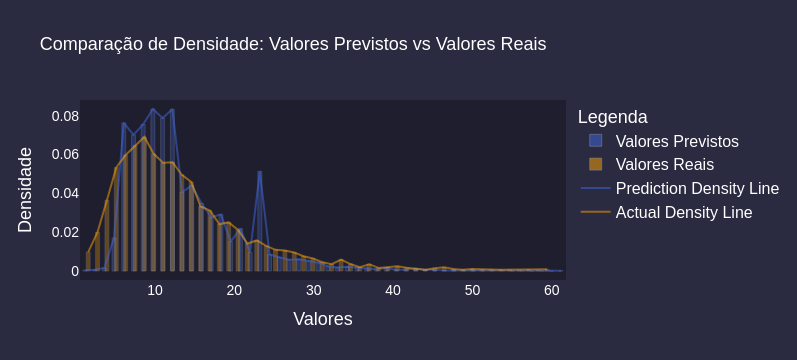

In [453]:
import plotly.graph_objects as go

# Calculando os dados do histograma
y_pred_density = np.histogram(y_pred_test, bins=50, density=True)
y_test_density = np.histogram(y_val, bins=50, density=True)

# Calculando pontos m√©dios dos bins
bins_pred = (y_pred_density[1][1:] + y_pred_density[1][:-1]) / 2
bins_test = (y_test_density[1][1:] + y_test_density[1][:-1]) / 2

# Cria√ß√£o do gr√°fico
fig = go.Figure()

# Adiciona o histograma para as predi√ß√µes
fig.add_trace(go.Bar(
    x=bins_pred,
    y=y_pred_density[0],
    name='Valores Previstos',
    marker=dict(color='royalblue', opacity=0.6),
    width=0.5
))

# Adiciona o histograma para os valores reais
fig.add_trace(go.Bar(
    x=bins_test,
    y=y_test_density[0],
    name='Valores Reais',
    marker=dict(color='orange', opacity=0.6),
    width=0.5
))

# Adiciona a linha de densidade para as predi√ß√µes
fig.add_trace(go.Scatter(
    x=bins_pred,
    y=y_pred_density[0],
    mode='lines',
    name='Prediction Density Line',
    line=dict(color='royalblue', width=2, dash='solid')
))

# Adiciona a linha de densidade para os valores reais
fig.add_trace(go.Scatter(
    x=bins_test,
    y=y_test_density[0],
    mode='lines',
    name='Actual Density Line',
    line=dict(color='orange', width=2, dash='solid')
))

# Configura√ß√£o do layout
fig.update_layout(
    title="Compara√ß√£o de Densidade: Valores Previstos vs Valores Reais",
    xaxis_title="Valores",
    yaxis_title="Densidade",
    legend_title="Legenda",
    template="plotly",
    plot_bgcolor="#1e1e2f",  # Cor do fundo
    paper_bgcolor="#2a2a40",  # Fundo do canvas
    barmode='overlay',  # Sobrep√µe os histogramas para compara√ß√£o
    title_font=dict(size=18, color='white'),  # Tamanho da fonte do t√≠tulo
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        title_font=dict(size=18, color='white'),  # Tamanho da fonte do t√≠tulo do eixo X
        tickfont=dict(size=14, color='white')  # Tamanho da fonte das legendas do eixo X
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        title_font=dict(size=18, color='white'),  # Tamanho da fonte do t√≠tulo do eixo Y
        tickfont=dict(size=14, color='white')  # Tamanho da fonte das legendas do eixo Y
    ),
    legend=dict(
        title_font=dict(size=18, color='white'),  # Tamanho da fonte do t√≠tulo da legenda
        font=dict(size=16, color='white')  # Tamanho da fonte das legendas
    ),
)

# Ajusta a opacidade para melhorar a visibilidade de sobreposi√ß√£o
fig.update_traces(opacity=0.5)

# Exibe o gr√°fico
fig.show()


Avaliando o gr√°fico, podemos observar que distribui√ß√µes dos valores previstos (azul) e reais (marrom) t√™m um alinhamento razo√°vel. Isso indica que o modelo baseline consegue capturar uma parte relevante da vari√¢ncia dos dados, podendo haver espa√ßo para melhorias.

Agora plotando um gr√°fico residual para analisar os desvios dos valores previstos em rela√ß√£o aos valores reais:

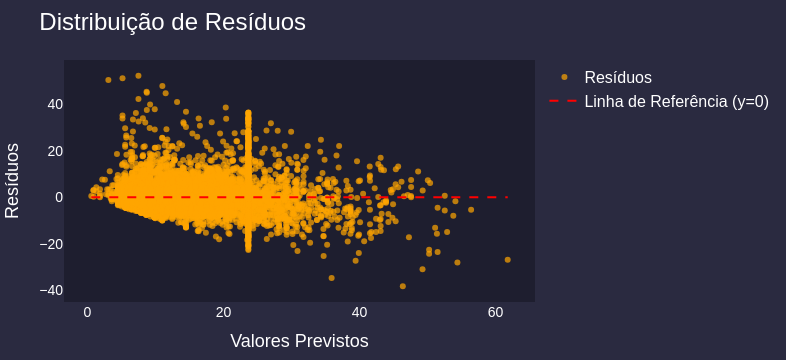

In [454]:
# Criar o DataFrame de res√≠duos
residuals_df = pd.DataFrame({
    'Predictions': y_pred_test,
    'Real Values': y_val,
    'Residuals': y_val - y_pred_test
})

# Criar o gr√°fico de dispers√£o
fig = go.Figure()

# Adiciona os pontos do gr√°fico de res√≠duos
fig.add_trace(go.Scatter(
    x=residuals_df['Predictions'],
    y=residuals_df['Residuals'],
    mode='markers',
    marker=dict(size=6, color='orange', opacity=0.7),
    name='Res√≠duos'
))

# Adiciona a linha de refer√™ncia em y=0
fig.add_trace(go.Scatter(
    x=[min(residuals_df['Predictions']), max(residuals_df['Predictions'])],
    y=[0, 0],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Linha de Refer√™ncia (y=0)'
))

# Configura√ß√£o do layout
fig.update_layout(
    title="Distribui√ß√£o de Res√≠duos",
    xaxis_title="Valores Previstos",
    yaxis_title="Res√≠duos",
    template="plotly",
    plot_bgcolor="#1e1e2f",  # Cor do fundo
    paper_bgcolor="#2a2a40",  # Cor do canvas
    title_font=dict(size=24, color='white'),  # Fonte do t√≠tulo
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        title_font=dict(size=18, color='white'),  # T√≠tulo do eixo X
        tickfont=dict(size=14, color='white')  # Ticks do eixo X
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        color='white',
        title_font=dict(size=18, color='white'),  # T√≠tulo do eixo Y
        tickfont=dict(size=14, color='white')  # Ticks do eixo Y
    ),
    legend=dict(
        title_font=dict(size=18, color='white'),  # Fonte do t√≠tulo da legenda
        font=dict(size=16, color='white')  # Fonte da legenda
    ),
    margin=dict(l=20, r=20, t=60, b=20),
)

# Exibe o gr√°fico
fig.show()


In [109]:
residuals_df.sample(12).style.background_gradient(cmap = 'Set3')

#### 3.2 Modelos com ajuste de Hiperpar√¢metros

Antes de implementarmos modelos mais complexos, √© uma boa id√©ia scriptar as etapas de preprocessamento que contemplam as se√ß√µes de Ingest√£o de dados e Limpeza de dados. Na se√ß√£o 3.1 o modelo _baseline_ foi treinado utilizando 80% dos dados referentes ao m√™s de janeiro, enquanto os 20% restantes foram reservados para valida√ß√£o/teste. No presente caso, ser√° utilizado o conjunto completo de dados do m√™s de janeiro como dados de treinamento. Enquanto que o m√™s de fevereiro ser√° utilizado como conjunto de teste.

`data_ingest` 

Esta fun√ß√£o converte o conjunto de dados parquet no formato pandas.DataFrame, filtra valores inv√°lidos, inputa valores faltantes e seleciona os atributos necess√°rias. Retorna os preditores (X) e o alvo (y):

In [9]:
def data_ingest(file_parquet):
    '''
    Carrega os dados brutos e aplica algumas padroniza√ß√µes 
    para a etapa de limpeza.
    '''

    # Converte os arquivos Parquet baixados em DataFrames pandas
    X = pd.read_parquet(file_parquet)

    # Processamento de datas
    X['lpep_pickup_datetime'] = pd.to_datetime(X['lpep_pickup_datetime'], errors='coerce')
    X['lpep_dropoff_datetime'] = pd.to_datetime(X['lpep_dropoff_datetime'], errors='coerce')
    X['duration'] = (X['lpep_dropoff_datetime'] - X['lpep_pickup_datetime']).dt.total_seconds() / 60

    # Filtrar valores inv√°lidos
    X = X[(X.duration >= 1) & (X.duration <= 60)]

    # Criando o atributo PU_DO_LocationID
    X['PU_DO_LocationID'] = X['PULocationID'].astype(str) + '_' + X['DOLocationID'].astype(str)
        
    # Selecionar os atributos eleitos
    #features = ['lpep_pickup_datetime', 'PU_DO_LocationID', 'trip_distance',  'duration']

    
    # Criar um novo DataFrame apenas com os atributos preditores
    #X = X[features]
    
    # Definir o atributo alvo
    y = X.pop('duration').values
    
    return X, y

`data_cleasing`

Essa fun√ß√£o de preprocessamento encapsula diversas bibliotecas de preprocessamento do `scikit-learning`, executando de forma ordenada as seguintes etapas:

> - `num_pipeline:` Imputa√ß√£o de atributos cujo os valores ausentes s√£o preenchidos com a moda estat√≠stica. E na sequ√™ncia, escala os dados (RobustScaler) para reduzir o impacto de outliers.

> - `ordinal_pipeline:` Codifica√ß√£o Nominal (OneHot Encoding) para os atributos categ√≥ricos, criando vari√°veis bin√°rias para cada categoria.

In [509]:
def data_cleasing(data, train_mode=True, preprocessor=None):
    '''
    Codifica√ß√£o de atributos
    '''
    
    # Definindo os atributos num√©ricos e categ√≥ricos
    num_features = ['trip_distance']
    nominal_features = ['PU_DO_LocationID']

    if train_mode:
       
        # Pipeline para atributos num√©ricos
        num_pipeline = Pipeline([
            #('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', RobustScaler())
        ])
        
        # Pipeline para atributos categ√≥ricos
        nominal_pipeline = Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])
        
        # Combina√ß√£o de pr√©-processadores para colunas num√©ricas e categ√≥ricas
        preprocessor = ColumnTransformer([
            ('num', num_pipeline, num_features),
            ('cat', nominal_pipeline, nominal_features)
        ])
        
        # Aplicando o preprocessor ao conjunto de treino e teste
        X_processed = preprocessor.fit_transform(data)

        mlflow_preprocessor =  TransformerWrapper(preprocessor)

        
        return X_processed, mlflow_preprocessor
    
    else:
        # Ajustar pipeline e transformar dados
        X_processed = preprocessor.predict(context=None, model_input=data)
    
        return X_processed

A classe `TransformerWrapper` permite que o preprocessador da fun√ß√£o `data_cleasing` seja registrado com uma PyFunc no rastreador de experimentos MLflow 

In [457]:
#TransformerWrapper
import mlflow
class TransformerWrapper(mlflow.pyfunc.PythonModel):
    """
    Wrapper para integra√ß√£o com o MLflow.

    Esta classe embrulha o transformer da fun√ß√£o `data_cleasing` em 
    compatibilidade com o formato PyFunc do MLflow, permitindo que seja registrado,
    armazenado e carregado em tempo de execu√ß√£o como um artefato do mlflow.
    """
    def __init__(self, transformer: ColumnTransformer):
        """
        Inicializa o wrapper do transformer para log_artifact com mlflow.

        Parameters:
        -----------
        transformer : ColumnTransformer
            O transformador ajustado para pr√©-processar os dados.
        """
        self.transformer = transformer

    def predict(self, context, model_input):
        """
        Aplica o pr√©-processamento ao conjunto de dados de entrada.
        """

        if not isinstance(model_input, pd.DataFrame):
            raise ValueError("Os dados de entrada devem ser fornecidos como um DataFrame.")
        
        return self.transformer.transform(model_input)


/home/wanderson/anaconda3/envs/mlops-env/lib/python3.12/site-packages/mlflow/pyfunc/utils/data_validation.py:134: UserWarning:

Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.



As fun√ß√µes a seguir permitem gerenciar m√∫ltiplos modelos preditivos de forma eficiente e integr√°-los ao rastreador de experimentos `MLflow` em um √∫nico fluxo de trabalho. Isso possibilita o uso de qualquer modelo ou pipeline compat√≠vel com o `scikit-learn`, al√©m de tornar a valida√ß√£o cruzada, o ajuste de hiperpar√¢metros e a an√°lise de desempenho mais intuitivos e eficazes.

`configure_mlflow`

A partir desta fun√ß√£o √© poss√≠vel integrar o `MLflow` ao pipeline de treinamento, assegurando a rastreabilidade de cada modelo treinado. No caso, ser√£o instanciados os modelos Linear Regression, Ridge, Lass e XGBoost, com suas respectivas grades de hiperpar√¢metros para otimiza√ß√£o.

In [6]:
import mlflow
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient

def configure_mlflow(exp_name):
    """
    Configura o experimento no MLflow e inicia um novo run principal (parent).

    Args:
        exp_name (str): Nome do experimento.

    Returns:
        str: ID do run parent iniciado.
    """

    # Configura a URI para um servidor local MLflow
    TRACKING_SERVER_HOST = "http://127.0.0.1:9090"
    mlflow.set_tracking_uri(TRACKING_SERVER_HOST)
    print(f"Tracking URI configurada para: '{mlflow.get_tracking_uri()}'")

    # Criar cliente MLflow
    client = MlflowClient()
    
    # Verificar se o experimento j√° existe
    experiment = client.get_experiment_by_name(exp_name)

    if experiment is not None and experiment.lifecycle_stage == "deleted":
        print(f"‚ö†Ô∏è O experimento '{exp_name}' est√° deletado. Restaurando...")
        client.restore_experiment(experiment.experiment_id)  # Restaura o experimento

        # Buscar novamente ap√≥s restaurar
        experiment = client.get_experiment_by_name(exp_name)

    if experiment is None:
        # Criar um novo experimento apenas se ele n√£o existir
        experiment_id = client.create_experiment(name=exp_name)
        print(f"üÜï Novo experimento criado com ID: {experiment_id}")
    else:
        experiment_id = experiment.experiment_id
        print(f"‚úÖ Experimento existente com ID: {experiment_id}")

    # **Importante**: Configurar explicitamente para evitar problemas de cache
    mlflow.set_experiment(exp_name)
 
    # Finalizar qualquer run ativo antes de iniciar um novo
    if mlflow.active_run():
        print(f"üõë Finalizando run ativo com ID: {mlflow.active_run().info.run_id}")
        print()
        print(f"üî¨ Iniciar uma nova bateria de experimentos")
        mlflow.end_run()

    #run = mlflow.start_run(experiment_id=experiment_id)
    # Inicia um run principal (parent) para agrupar os experimentos
    parent_run = mlflow.start_run(experiment_id=experiment_id, nested= True)
    parent_run_id = parent_run.info.run_id

    # Iniciar um novo run associado ao experimento
    print()
    print(f"üöÄ Iniciando um run principal no experimento '{exp_name}' (Parent ID: {parent_run_id}).")
    print()
    
    return parent_run_id  # Retorna o ID do run principal

`train_model`
***

1. **Configura√ß√£o Simplificada de Modelos**  
   Permite configurar m√∫ltiplos modelos e seus respectivos hiperpar√¢metros de forma pr√°tica. Integra pipelines do `scikit-learn`, garantindo que cada etapa do pr√©-processamento e modelagem seja tratada adequadamente.

2. **Treinamento Automatizado com Busca de Hiperpar√¢metros**  
   Utiliza o `RandomizedSearchCV` para explorar os melhores hiperpar√¢metros de forma eficiente, adaptando automaticamente o n√∫mero de itera√ß√µes √†s combina√ß√µes dispon√≠veis.

3. **Valida√ß√£o Cruzada Personaliz√°vel**  
   Suporta valida√ß√£o cruzada com o n√∫mero de divis√µes (`n_splits`) ajust√°vel, fornecendo m√©tricas consistentes e confi√°veis para cada modelo.
---




In [510]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
def train_model(model, hyperparams_grid , random_search_params, X_train, y_train):
    """
    Fun√ß√£o integrada ao pipTrain para treinar cada modelo usando RandomizedSearchCV.

    Args:
        model: Modelo ou pipeline a ser treinado.
        hyperparameters (list): Grade de hiperpar√¢metros para otimiza√ß√£o.
        random_search_params: Par√¢metros extras para o RandomizedSearchCV (como scoring, n_iter, cv, etc).
        X_train (array-like): Dados de treino.
        y_train (array-like): Alvo de treino.

    Returns:
        tuple: Melhor modelo treinado com o melhor conjunto de hiperpar√¢metros obtidos pelo RandomizedSearchCV.
    """
    warnings.filterwarnings("ignore", message=".*The total space of parameters.*")
    
    hp_search = RandomizedSearchCV(
        model,
        param_distributions=hyperparams_grid,
        random_state=42,
        **random_search_params
    )
    hp_search.fit(X_train, y_train)
    return hp_search.best_estimator_, hp_search.best_params_


`objective`

Esta fun√ß√£o  √© respons√°vel pela previs√£o e avalia√ß√£o do modelo com base nos melhores hiperpar√¢metros encontrados via RandomizedSearchCV. As m√©tricas s√£o automaticamente registradas no `MLflow`
***

1. **An√°lise Detalhada de Desempenho**  
   Oferece uma apresenta√ß√£o completa dos resultados, incluindo m√©tricas como R¬≤ e RMSE para os conjuntos de treino e teste, al√©m de estat√≠sticas detalhadas da valida√ß√£o cruzada, como valores m√≠nimo, m√°ximo, desvio padr√£o e m√©dia.

2. **Exibi√ß√£o dos Resultados**
   Salva automaticamente os melhores modelos em arquivos `.pkl`, para f√°cil rastreamento. E exibe relat√≥rios formatados e informativos para cada modelo, tornando a an√°lise de resultados mais agrad√°vel e acess√≠vel.
***

In [511]:
import logging
def objective(
    exp_name,
    model_name,
    best_model,
    best_params,
    X_train,
    X_test,
    y_train,
    y_test
):  
    """
    Esta fun√ß√£o recebe cada modelo fitado na fun√ß√£o train_model com seus 
    respectivos melhores hiperpar√¢metros, e realiza as previs√µes fornecidos
    e grava os resultados no MLflow.

    Args:
        model_name (str): Nome do modelo que est√° sendo treinado (por exemplo, 'LinearRegression').
        best_model: Modelo treinado com os melhores hiperpar√¢metros.
        preprocessor (str): Nome do pr√©-processador utilizado (por exemplo, 'StandardScaler').
        best_params (dict): Dicion√°rio contendo os melhores hiperpar√¢metros encontrados para o modelo.
        X_train (array-like): Dados de treino (features) usados para treinar o modelo.
        X_test (array-like): Dados de teste (features) usados para avaliar o modelo.
        y_train (array-like): Valores alvo (target) de treino para o modelo.
        y_test (array-like): Valores alvo (target) de teste para avalia√ß√£o do modelo.
        exp_name (str, opcional): Nome do experimento no MLflow, usado para organizar e trackear as execu√ß√µes.

    Returns:
        None: A fun√ß√£o realiza o treinamento, avalia√ß√£o e log de par√¢metros, m√©tricas e artefatos no MLflow.

    """

    # Filtrar e omitir apenas o warning de signature do mlflow
    logging.getLogger("mlflow.models.model").addFilter(
        lambda record: "Model logged without a signature and input example" not in record.getMessage()
    )

    run = mlflow.active_run()  # Obt√©m a run ativa

    # Nome aleat√≥rio gerado pelo MLflow da run atual (sem criar nova)
    generated_name = run.data.tags.get("mlflow.runName", run.info.run_id)
    
    # Criar um novo nome concatenando com o nome do modelo
    custom_run_name = f"{model_name}_{generated_name}"
    
    # Definir o novo nome na run ativa
    mlflow.set_tag("mlflow.runName", custom_run_name)
    mlflow.set_tag("author", "Wanderson")
    
    # salvar o modelo no mlflow
    mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="models",
        input_example=X_train[:1],
        signature=infer_signature(X_train, best_model.predict(X_train))
    )

    # Predi√ß√µes
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # M√©tricas
    metrics_train = {
        "rmse_train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "r2_train": r2_score(y_train, y_pred_train)
    }
    metrics_test = {
        "rmse_test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "r2_test": r2_score(y_test, y_pred_test)
    }

    # Log das m√©tricas no MLflow
    for key, value in {**metrics_train, **metrics_test}.items():
        mlflow.log_metric(key, value)
    # Log dos melhores par√¢metros
    for key, value in best_params.items():
        mlflow.log_param(key, value)

    mlflow.log_param("model_name", model_name)
    mlflow.set_tag("model_type", model_name)  # Ajuda na organiza√ß√£o

    print(f"Modelo {model_name} avaliado e logado.")
    print()

`pipTrain`

Gerencia as fun√ß√µes `train_model` e `objective` para efetuar o treinamento de multiplos modelos com seus respectivos conjuntos de hiperpar√¢metros para otimiza√ß√£o. 

In [512]:
def pipTrain(exp_name,
              models, 
              preprocessor, 
              hyperparameters, 
              random_search_params, 
              X_train, X_test, y_train, y_test):
    """
    Executa o pipeline de treinamento com runs aninhadas no MLflow.
    Cada n modelo ser√° treinado dentro de um run filho (child).
    
    Args:
        exp_name (str): Nome do experimento.
        run_id (str): Run_id do pr√©-processador.
        models (list): Lista de pipelines de modelos a serem treinados.
        hyperparameters (list): Hiperpar√¢metros para cada modelo.
        random_search_params: Par√¢metros extras para o RandomizedSearchCV (como scoring, n_iter, cv, etc).
        X_train (pd.DataFrame): Dados de treino.
        X_test (pd.DataFrame): Dados de teste.
        y_train (pd.Series): Labels de treino.
        y_test (pd.Series): Labels de teste.
    """

    parent_run_id = configure_mlflow(exp_name)  # Criar uma run pai

    # Criar run filha para o pr√©-processador dentro da run pai
    with mlflow.start_run(run_id=parent_run_id, nested=True) as parent_run:
        with mlflow.start_run(nested=True):  # Run filha do preprocessor
            mlflow.set_tag("author", "Wanderson")
            mlflow.set_tag("run_type", "preprocessor")
            # Definir um nome customizado para a run ativa
            run = mlflow.active_run() 
            generated_name = run.data.tags.get("mlflow.runName", run.info.run_id)
            custom_run_name = f"Preprocessor_{generated_name}"            
            mlflow.set_tag("mlflow.runName", custom_run_name)
            # salva o preprocessador no mlflow
            mlflow.pyfunc.log_model(
                python_model=preprocessor,
                artifact_path="preprocessor",
                conda_env=mlflow.pyfunc.get_default_conda_env(),
            )
            print(f"‚úÖ Pr√©-processador registrado no MLflow como run filho (Run ID: {mlflow.active_run().info.run_id})")

        # Este loop permite que a fun√ß√£o train_model receba cada 
        # modelo com sua respectiva grade de hiperparametros
        for i, model in enumerate(models): #  
            model_name = type(model.steps[-1][1]).__name__
            print(f"üèãÔ∏è‚Äç‚ôÇÔ∏è Treinando modelo: {model_name}")
            
            best_model, best_hp = train_model(
                model = model, 
                hyperparams_grid = hyperparameters[i], 
                random_search_params = random_search_params,
                X_train = X_train, 
                y_train = y_train)
            
            # Criar uma run filha para cada modelo dentro da run pai
            with mlflow.start_run(nested=True):  
                objective(
                    exp_name=exp_name,
                    model_name=model_name,
                    best_model=best_model,
                    best_params=best_hp,
                    X_train=X_train,
                    X_test=X_test,
                    y_train=y_train,
                    y_test=y_test,
                )
            
        print("‚úÖ Pipeline de treinamento conclu√≠do!")

***

Agora tem-se tudo pronto para efetuar o treinamento dos modelos. Primeiramente deve-se aplicar as etapas de preprocessamento nos dados de treino e valida√ß√£o:

In [513]:
from sklearn.model_selection import train_test_split

print("Dados - M√™s de Janeiro")

df_jan = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet'

X, y = data_ingest(df_jan)

# Dividindo os dados em treino e valida√ß√£o:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=28)

X_train_processed, train_preprocessor = data_cleasing(X_train, train_mode=True)
X_val_processed = data_cleasing(X_val, train_mode=False, preprocessor = train_preprocessor)

Dados - M√™s de Janeiro


In [514]:
print("Atributo alvo (y):",type(y_train), "\n\nAtributos Preditores (X):")
X_train_processed

Atributo alvo (y): <class 'numpy.ndarray'> 

Atributos Preditores (X):


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 86891 stored elements and shape (43498, 4580)>

In [515]:
print("Atributo alvo (y):",type(y_val), "\n\nAtributos Preditores (X):")
X_val_processed

Atributo alvo (y): <class 'numpy.ndarray'> 

Atributos Preditores (X):


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21178 stored elements and shape (10875, 4580)>

Conforme os resultados acima, a etapa de preprocessamento foi executado com sucesso. Ao definir-se `train_mode = True`, o m√©todo `fit_transform()` √© aplicado, ajustando o pipeline e transformando os dados de treinamento (m√™s de janeiro). A chamada da fun√ß√£o no modo `train_mode = False` (via `transform()`) para os dados de teste (m√™s de fevereiro) aplica as transforma√ß√µes previamente ajustadas com os dados de treino (m√™s de janeiro), garantindo a consist√™ncia dos dados. Uma evid√™ncia disso √© que a matriz esparsa gerada para os dados de janeiro apresenta as mesmas dimens√µes da matriz do m√™s de fevereiro, comprovando que o pr√©-processamento foi consistentemente aplicado a todos os dados.

***

Agora pode-se iniciar o processo de treinamento dos modelos. Iniciando o servidor MLflow a partir do localhost (√© melhor usar um terminal bash externo):

1. No terminal bash ative o ambiente virtual do jupyter notebook acesse o diret√≥rio de trabalho e execute o comando: 

- `mlflow server --host 127.0.0.1 --port 9090 --backend-store-uri sqlite:///mlruns.db`

2. Abrir o link gerado para iniciar o Mlflow:
- `http://127.0.0.1:9090`

In [306]:
# Exibi o local onde o experimentos ser√£o salvos:
print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

tracking URI: 'http://127.0.0.1:8080'


Configurando a lista de modelos e seus hiperpar√¢metros:

In [307]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor

# Criar a lista de modelos 
models = [
    Pipeline([('LinearRegression', LinearRegression())]),
    Pipeline([('Ridge', Ridge())]),
    Pipeline([('Lasso', Lasso())]),
    Pipeline([('xgb-regressor', XGBRegressor())])
]

# Hiperpar√¢metros para os modelos
hyperparameters = [
    {},  # Linear Regression n√£o precisa de hiperpar√¢metros para esta abordagem
    {'Ridge__alpha': [0.01, 0.1, 1, 5, 10]},
    {'Lasso__alpha': [0.01, 0.1, 1, 5, 10]},
    {
     'xgb-regressor__n_estimators': [200, 300, 400],
     'xgb-regressor__learning_rate': [0.05, 0.1, 0.15],
     'xgb-regressor__max_depth': [6, 8, 10],
     'xgb-regressor__min_child_weight': [3, 5, 7],
     'xgb-regressor__gamma': [0.3, 0.5, 0.7],
     'xgb-regressor__subsample': [0.6, 0.8, 1.0],
     'xgb-regressor__colsample_bytree': [0.4, 0.5, 0.6],
     'xgb-regressor__reg_alpha': [0, 0.5, 1],
     'xgb-regressor__reg_lambda': [0.5, 1, 1.5],
     'xgb-regressor__seed': [42]
    }
]


# Par√¢metros para o RandomizedSearchCV
random_search_params={
     'n_iter': 10,
     'scoring': 'r2',  
     'cv': 3,
     'verbose':1,
     'n_jobs':-1,          
     # outros par√¢metros, se necess√°rio
}

exp_name = "nyc-green-taxi-2024-01"

Agora podemos executar o processo de treinamento:

In [516]:
# Executar o fluxo de treinamento
pipTrain(
    exp_name=exp_name,
    models=models,
    preprocessor = train_preprocessor,
    hyperparameters=hyperparameters,
    random_search_params = random_search_params,
    X_train=X_train_processed,
    X_test=X_val_processed,
    y_train=y_train,
    y_test=y_val
)

Tracking URI configurada para: 'http://127.0.0.1:8080'
‚úÖ Experimento existente com ID: 1
üõë Finalizando run ativo com ID: 0f37f0fd0cd24cc9919cb96acf9f099c

üî¨ Iniciar uma nova bateria de experimentos
üèÉ View run angry-slug-584 at: http://127.0.0.1:8080/#/experiments/1/runs/0f37f0fd0cd24cc9919cb96acf9f099c
üß™ View experiment at: http://127.0.0.1:8080/#/experiments/1

üöÄ Iniciando um run principal no experimento 'nyc-green-taxi-2024-01' (Parent ID: 93d51571866f46ccb07d2c7d285b2509).

‚úÖ Pr√©-processador registrado no MLflow como run filho (Run ID: 52faf29345674b73a9c00cfe73a60ab6)
üèÉ View run Preprocessor_rumbling-dog-241 at: http://127.0.0.1:8080/#/experiments/1/runs/52faf29345674b73a9c00cfe73a60ab6
üß™ View experiment at: http://127.0.0.1:8080/#/experiments/1
üèãÔ∏è‚Äç‚ôÇÔ∏è Treinando modelo: LinearRegression
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Modelo LinearRegression avaliado e logado.

üèÉ View run LinearRegression_serious-pug-807 at: http://1

Ao acessar a MLflow UI podemos acessar o desempenho dos quatro modelos de regress√£o: XGBRegressor, Lasso, Ridge e Regress√£o Linear. 

 **XGBRegressor**:
   - O XGBRegressor se mostrou o melhor modelo, com maior poder explicativo e menor erro de previs√£o, com um \( R^2_{test} = 0.6738 \), indicando que explica cerca de 67,38% da variabilidade dos dados.
   - O erro m√©dio quadr√°tico (RMSE) no teste √© 5.20, o menor entre os modelos testados.
   - H√° uma pequena diferen√ßa entre \( R^2_{train} \) e \( R^2_{test} \), sugerindo que o modelo generaliza bem sem superajuste significativo.

 **Lasso**:
   - Desempenho muito fraco, com \( R^2_{test} = 0.00012 \), indicando que o modelo praticamente n√£o consegue explicar a variabilidade dos dados.
   - O RMSE √© o mais alto (9.11 no teste), indicando que as previs√µes s√£o muito imprecisas.
   - O baixo \( R^2 \) pode ser resultado de uma regulariza√ß√£o excessiva, levando o modelo a subajustar os dados.

 **Ridge**:
   - Melhor desempenho que a Regress√£o Linear, com \( R^2_{test} = 0.5764 \).
   - O RMSE no teste (5.93) √© maior que o do XGBRegressor, mas ainda razo√°vel.
   - Parece equilibrar bem o ajuste, sem overfitting significativo.

 **Regress√£o Linear**:
   - Resultados similares ao Ridge, mas um pouco piores (\( R^2_{test} = 0.5701 \)).
   - O RMSE no teste (5.97) √© ligeiramente maior do que no Ridge.
   - Overfitting leve, j√° que \( R^2_{train} = 0.729 \) √© consideravelmente maior que \( R^2_{test} \).


Considerando os resultados das m√©tricas, o XGBRegressor se destaca como a melhor escolha. No est√°gio atual de desenvolvimento, em termos de automa√ß√£o,  estamos no limite do Jupyter Notebook. Portanto, √© fundamental transform√°-lo em um MLOpsPython script, isto √©, agregar ferramentas de MLOps ao projeto, como a ado√ß√£o de um framework de orquestra√ß√£o, como Prefect ou Airflow, permitindo a automa√ß√£o e o agendamento das tarefas de treinamento e deployment de modelos (preferencialmente conteinerizados), seja em batch mode ou como servi√ßo web. 

Vale ressaltar que este presente notebook foi desenvolvido com o objetivo de fornecer uma base s√≥lida para constru√ß√£o de um pipeline MLOps robusto. Por exemplo, o c√≥digo j√° possui uma forte integra√ß√£o ao MLflow para rastreamento de experimentos, o que garante reprodutibilidade e organiza√ß√£o ao longo do ciclo de vida do modelo. Al√©m disso, a ado√ß√£o de um framework de orquestra√ß√£o tornar√° a automa√ß√£o ainda mais eficiente, especialmente quando combinada com um servi√ßo de computa√ß√£o em nuvem que fomenta o trabalho colaborativo. Neste projeto, a Azure ser√° utilizada como plataforma, proporcionando suporte a cargas de trabalho mais complexas e facilitando o deployment em ambiente de produ√ß√£o.

A partir da interface de usu√°rio do MLflow, podemos facilmente registrar modelos atribuindo qualquer string como alias, permitindo gerenciar diferentes vers√µes de um mesmo modelo dentro do Model Registry. Definir aliases informativos, como "Champion", "Staging" e "Production", facilitam a transi√ß√£o entre vers√µes sem a necessidade de modificar refer√™ncias no c√≥digo. Al√©m da interface gr√°fica, a linha de comando tamb√©m oferece comandos poderosos para gerenciar modelos registrados.

In [367]:
mlflow.search_experiments()

[<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1738773274888, experiment_id='1', last_update_time=1738773274888, lifecycle_stage='active', name='nyc-green-taxi-2024-01', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1738773242385, experiment_id='0', last_update_time=1738773242385, lifecycle_stage='active', name='Default', tags={}>]

In [435]:
# Exibir modelos registrados
mlflow.search_registered_models()

[<RegisteredModel: aliases={'champion': '1'}, creation_timestamp=1738873451482, description='xgboost regressor model ', last_updated_timestamp=1738873668965, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738873451548, current_stage='None', description='', last_updated_timestamp=1738873451548, name='nyc-taxi-data-model-prod', run_id='79d4cef127fb4b4b851da97d8d996bd3', run_link='', source='mlflow-artifacts:/1/79d4cef127fb4b4b851da97d8d996bd3/artifacts/models', status='READY', status_message=None, tags={'validation_status': 'approved'}, user_id='', version='1'>], name='nyc-taxi-data-model-prod', tags={}>,
 <RegisteredModel: aliases={'latest-preprocessor': '1'}, creation_timestamp=1738873208027, description='Feature engineering steps (scaling, encoding etc.)', last_updated_timestamp=1738873389555, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738873208064, current_stage='None', description='', last_updated_timestamp=1738873208064, name='nyc-taxi-data-pre

In [436]:
# renomear um modelo registrado
from mlflow.tracking import MlflowClient
client = MlflowClient()
client.rename_registered_model(
    name="nyc-taxi-data-preprocessor-prod",
    new_name="nyc-taxi-preprocessor-prod",
)

client.rename_registered_model(
    name="nyc-taxi-data-model-prod",
    new_name="nyc-taxi-model-prod",
)
# Exibir modelos registrados
mlflow.search_registered_models()

[<RegisteredModel: aliases={'champion': '1'}, creation_timestamp=1738873451482, description='xgboost regressor model ', last_updated_timestamp=1738874670695, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738873451548, current_stage='None', description='', last_updated_timestamp=1738874670695, name='nyc-taxi-model-prod', run_id='79d4cef127fb4b4b851da97d8d996bd3', run_link='', source='mlflow-artifacts:/1/79d4cef127fb4b4b851da97d8d996bd3/artifacts/models', status='READY', status_message=None, tags={'validation_status': 'approved'}, user_id='', version='1'>], name='nyc-taxi-model-prod', tags={}>,
 <RegisteredModel: aliases={'latest-preprocessor': '1'}, creation_timestamp=1738873208027, description='Feature engineering steps (scaling, encoding etc.)', last_updated_timestamp=1738874670658, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738873208064, current_stage='None', description='', last_updated_timestamp=1738874670658, name='nyc-taxi-preprocessor-prod'

In [376]:
mlflow.search_registered_models()

[<RegisteredModel: aliases={'champion': '1'}, creation_timestamp=1738841680442, description='Uses xgb regressor', last_updated_timestamp=1738842754507, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738841680512, current_stage='None', description='', last_updated_timestamp=1738842671032, name='nyc-taxi_model-prod', run_id='4abef3d567334457a009576ed1991761', run_link='', source='mlflow-artifacts:/1/4abef3d567334457a009576ed1991761/artifacts/models', status='READY', status_message=None, tags={}, user_id='', version='1'>], name='nyc-taxi_model-prod', tags={'validation_status': 'approved'}>,
 <RegisteredModel: aliases={'latest-preprocessor': '1'}, creation_timestamp=1738845182319, description='', last_updated_timestamp=1738845182365, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1738845182365, current_stage='None', description=('Serialized preprocessing pipeline object. It includes sklearn '
  'transformations applied to the raw data, such as imputer, scal

No contexto de um ambiente de produ√ß√£o, para assegurar que o modelo continue gerando previs√µes confi√°veis ao longo do tempo, √© crucial monitorar continuamente o desempenho e a qualidade do modelo. A constru√ß√£o de um pipeline de monitoramento diretamente no Jupyter Notebook n√£o √© pr√°tico. No entanto, desde j√° √© poss√≠vel realizar alguns ensaios, por exemplo calcular artefatos de monitoramento. Na pr√≥xima se√ß√£o, utilizarei o Evidently para gerar m√©tricas detalhadas sobre drift de dados, desempenho preditivo e integridade do modelo. Essas m√©tricas devem ser futuramente integradas ao pipeline MLOps, com o uso do Prometheus para armazenamento e consulta eficientes, e o Grafana para a constru√ß√£o de dashboards interativos que possibilitem a visualiza√ß√£o e an√°lise dos resultados.

### 3 - Monitoramento

Para estabelecer um pipeline de monitoramento √© essencial n√£o apenas calcular m√©tricas como o drift entre os dados de refer√™ncia (ex: dados de treinamento) e os dados atuais (ex: dados de valida√ß√£o), mas tamb√©m estruturar o processo de versionamento e armazenamento dos artefatos pr√©-processamento e infer√™ncia.

Para logar o artefato de preprocessamento e o melhor modelo ML, existem diferentes abordagens. Considerando que o MLflow foi aqui utilizado para rastrear os experimentos, √© poss√≠vel um carregamento direto dos artefatos, sem a necessidade do tracking server, o que pode ser √∫til para testes locais, mas n√£o √© a solu√ß√£o mais pr√°tica em um ambiente de produ√ß√£o. A abordagem mais automatizada e recomendada envolve o uso do Model Registry, tendo como requisito a conex√£o ao tracking server para a utiliza√ß√£o dos aliases para versionamento e promo√ß√£o de modelos de forma r√°pida e estruturada. Adotando a abordagem mais automatizada:

In [7]:
import mlflow

# No terminal bash ative o ambiente virtual desse jupyter notebook e execute o comando:
# mlflow server --host 127.0.0.1 --port 9090 --backend-store-uri sqlite:///mlruns.db
TRACKING_SERVER_HOST = "http://127.0.0.1:9090"
mlflow.set_tracking_uri(TRACKING_SERVER_HOST)

# logar o preprocesador mais atual
preprocessor_registered = "nyc-taxi-preprocessor-prod"
preprocessor_alias = "latest-preprocessor"
print("Preprocessador")
mlflow_preprocessor = mlflow.pyfunc.load_model(f"models:/{preprocessor_registered}@{preprocessor_alias}")

# logar o melhor modelo ml regitrado para inferencia
model_registered = "nyc-taxi-model-prod"
model_alias = "champion"
print("Modelo ML")
mlflow_model = mlflow.sklearn.load_model(f"models:/{model_registered}@{model_alias}")

Preprocessador


Modelo ML


Agora gerando os dados de refer√™ncia para compara√ß√£o:

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_jan = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet'

X, y = data_ingest(df_jan)

# Dividindo os dados em treino e valida√ß√£o:
train_df, val_df, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=28)

In [ ]:
# Definir colunas num√©ricas e categ√≥ricas
numerical_features=['trip_distance']
categorical_features=['PU_DO_LocationID']

# Aplicar o preprocessador
X_train_processed = mlflow_preprocessor.predict(train_df[numerical_features + categorical_features])

# Realizar previs√µes com o modelo treinado
y_train_preds = mlflow_model.predict(X_train_processed)

# Construindo os dados de refer√™ncia 
train_df['trip_duration'] = y_train_preds

train_df.info()

E os dados atuais:

In [ ]:
# Aplicar o preprocessador
X_val_processed = mlflow_preprocessor.predict(val_df[numerical_features + categorical_features])

# Realizar previs√µes com o modelo de valida√ß√£o
y_val_preds = mlflow_model.predict(X_val_processed)

# Construindo os dados de refer√™ncia
val_df['trip_duration'] = y_val_preds

val_df.info()

#### 3.1 - Evidently: calculo de m√©tricas

Para garantir que o Evidently processe os dados corretamente √© importante definir um Column mapping especificando os atributos categ√≥ricos e num√©ricos para que o Evidently realize o teste estat√≠stico correto para cada uma delas. Embora o mesmo possa analisar a estrutura de dados automaticamente, especificar manualmente a natureza dos atributos ajuda a minimizar erros.


In [ ]:
column_mapping = ColumnMapping(
    target=None,
    prediction="trip_duration",
    numerical_features=["trip_distance"],
    categorical_features=["PU_DO_LocationID"],
    datetime="lpep_pickup_datetime"  # Adicionando a refer√™ncia temporal
)

As seguintes m√©tricas ser√£o calculadas para gerar um relat√≥rio de monitoramento:  

1. **`ColumnDriftMetric`** ‚Üí Mede o drift (mudan√ßa na distribui√ß√£o) de uma coluna espec√≠fica entre dois conjuntos de dados.  

2. **`DatasetDriftMetric`** ‚Üí Avalia se ocorreu drift significativo no conjunto de dados como um todo.  

3. **`DatasetMissingValuesMetric`** ‚Üí Analisa valores ausentes no dataset e fornece estat√≠sticas sobre a completude dos dados.

Definindo a estrutura do relat√≥rio:

In [ ]:
from evidently.report import Report
from evidently.metrics import ColumnDriftMetric, DatasetDriftMetric, DatasetMissingValuesMetric

report = Report(metrics=[
    ColumnDriftMetric(column_name='trip_duration'),
    DatasetDriftMetric(),
    DatasetMissingValuesMetric()]
    )

Agora usando as bibliotecas do Evidently para o calculo das m√©tricas comparando os dados atuais (val_df) com os dados de refer√™ncia (train_df):

In [ ]:
report.run(reference_data=train_df, current_data=val_df, column_mapping=column_mapping)

Exibindo o relat√≥rio em html:


In [ ]:
report.show(mode='inline')

A partir do relat√≥rio de data drift gerado pelo evidently:

1. **Drift no atributo alvo `trip_duration`**  
   - O m√©todo de detec√ß√£o usado foi a **dist√¢ncia de Wasserstein**, resultando em um **drift score de 0.022**, que √© muito baixo para indicar uma mudan√ßa relevante.  
   - O gr√°fico de drift ao longo do tempo mostra a distribui√ß√£o das previs√µes **atuais (vermelho)** comparadas com as previs√µes de **refer√™ncia (verde)**. Pequenas flutua√ß√µes s√£o normais, mas como a maior parte dos valores **permanece dentro da faixa de varia√ß√£o esperada (verde claro)**, o drift n√£o √© significativo ao longo do tempo.

2. **Drift no Conjunto de Dados**  
   - O **drift geral dos atributos preditores n√£o foi detectado**.  
   - A **propor√ß√£o de atributos afetadas pelo drift com respeito ao numero total de atributos √© 33.3 % (1/3)**, o que indica uma leve mudan√ßa, mas n√£o o suficiente para disparar um alerta. O **threshold para detec√ß√£o de drift √© 0.5**, e o valor calculado est√° abaixo disso.   

Embora um unico atributo tenha apresentado um drift (o que √© esperado, considerando que o mesmo √© o atributo a ser predito), o dataset como um todo est√° est√°vel. Portanto, a partir desta an√°lise de monitoramento pode-se sugerir que o modelo preditivo n√£o est√° sofrendo mudan√ßas signficativas no padr√£o dos dados de entrada, ent√£o n√£o h√° necessidade imediata de re-treinamento.
 
Obtendo o relat√≥rio em formato de dicion√°rio para uso posterior: 

In [ ]:
report_dict = report.as_dict()

In [ ]:
# Obtendo o relat√≥rio como um dicion√°rio de dataframes caso n√£o seja poss√≠vel renderizar o html
report_df = report.as_dataframe()

report_df

#### 3.2 - Evidently: Monitoring Dashboard

Nesta se√ß√£o ser√° gerado um dashboard interativo que auxilia monitoriza√ß√£o do desempenho do modelo de machine learning para an√°lise de drift e qualidade de dados. 

In [ ]:
from evidently.metric_preset import DataDriftPreset, DataQualityPreset
from evidently.ui.workspace import Workspace
from evidently.ui.dashboards import DashboardPanelCounter, DashboardPanelPlot, CounterAgg, PanelValue, PlotType, ReportFilter
from evidently.renderers.html_widgets import WidgetSize

In [ ]:
# Definindo o workspace
ws = Workspace("workspace")
project = ws.create_project("NYC Taxi Data Quality Monitoring.")
project.description = "Previs√£o de Dura√ß√£o das Corridas de T√°xi NYC"
project.save()


Criando um relat√≥rio de monitoramento de qualidade dos dados:

In [ ]:
import datetime
regular_report = Report(
    metrics=[
        DataQualityPreset()  # Usa um conjunto pr√©-definido de m√©tricas de qualidade dos dados
    ],
    timestamp=datetime.datetime(2024,1,2)  # Define um timestamp para o relat√≥rio
)
# Criar um relat√≥rio de monitoramento para as previs√µes ocorridas no dia 01/01/2024
regular_report.run(
    reference_data=None,  # N√£o compara com dados hist√≥ricos, apenas avalia os dados atuais.
    current_data=val_df.loc[val_df.lpep_pickup_datetime.between('2024-01-02', '2024-01-03', inclusive="left")],
    column_mapping=column_mapping
)
#regular_report

In [ ]:
# Adicionar o relat√≥rio acima ao dashboard
ws.add_report(project.id, regular_report)

In [ ]:
# Configura√ß√£o do dashboard para monitoramento do NYC Taxi Data
project.dashboard.add_panel(
    DashboardPanelCounter(
        filter=ReportFilter(metadata_values={}, tag_values=[]),
        agg=CounterAgg.NONE,
        title="NYC Taxi Data Dashboard"
    )
)

# Painel: Contagem de Infer√™ncias
project.dashboard.add_panel(
    DashboardPanelPlot(
        filter=ReportFilter(metadata_values={}, tag_values=[]),
        title="Inference Count",
        values=[
            PanelValue(
                metric_id="DatasetSummaryMetric",
                field_path="current.number_of_rows",
                legend="Total Inferences"
            ),
        ],
        plot_type=PlotType.BAR,
        size=WidgetSize.HALF,
    )
)

# Painel: Contagem de Valores Ausentes
project.dashboard.add_panel(
    DashboardPanelPlot(
        filter=ReportFilter(metadata_values={}, tag_values=[]),
        title="Number of Missing Values",
        values=[
            PanelValue(
                metric_id="DatasetSummaryMetric",
                field_path="current.number_of_missing_values",
                legend="Missing Values"
            ),
        ],
        plot_type=PlotType.LINE,
        size=WidgetSize.HALF,
    )
)

# Salva a configura√ß√£o do dashboard
project.save()


Agora √© s√≥ definir uma conex√£o local ao evidently ui para ter acesso ao dashboard.

1. No bash terminal ative o ambiente virtual desse jupyter notebook

2. Agora digite o comando: `evidently ui`

Por padr√£o, o servidor do Evidently opera no endere√ßo localhost (127.0.0.1) e usa a porta 8000